## Load Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Load Data 

In [4]:
df=pd.read_csv('ASII.JK.csv')

## Data Exploration

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-28,5175.0,5225.0,5125.0,5150.0,4978.488770,24346700
1,2021-05-31,5175.0,5300.0,5150.0,5250.0,5075.158691,41498000
2,2021-06-02,5350.0,5350.0,5275.0,5325.0,5147.660645,43217400
3,2021-06-03,5350.0,5350.0,5275.0,5350.0,5171.828125,49012700
4,2021-06-04,5325.0,5350.0,5200.0,5225.0,5050.991211,35211100


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
238,2022-05-20,7050.0,7200.0,7050.0,7125.0,7125.0,37674800
239,2022-05-23,7125.0,7175.0,6825.0,6950.0,6950.0,46368600
240,2022-05-24,7025.0,7200.0,7025.0,7150.0,7150.0,52177200
241,2022-05-25,7100.0,7175.0,7050.0,7100.0,7100.0,51200500
242,2022-05-27,7200.0,7300.0,7150.0,7225.0,7225.0,34766600


In [7]:
df.shape

(243, 7)

In this Dataset , we have total 243 tows and 7 columns.

In [8]:
df.size

1701

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,243.000000,243.000000,243.000000,243.000000,243.000000,2.430000e+02
mean,5759.567901,5835.823045,5676.851852,5754.444444,5601.984124,4.680977e+07
std,666.298303,686.098339,652.745051,674.594460,690.525955,2.799389e+07
min,4710.000000,4740.000000,4640.000000,4650.000000,4495.140625,1.426000e+07
25%,5225.000000,5300.000000,5150.000000,5237.500000,5063.074951,2.887800e+07
50%,5650.000000,5750.000000,5575.000000,5650.000000,5505.300293,4.058870e+07
75%,6212.500000,6250.000000,6125.000000,6200.000000,6041.214355,5.214710e+07
max,7425.000000,7700.000000,7225.000000,7575.000000,7381.000000,2.566550e+08


From the description we get to know that ; 

Maximum opening price recorded till date is 7425 and minimum is 4710

Maximum closing Price is 7575 and minimum price is 4650

The Maximum Adjusted Closing Price was 7381 and minimum price is 4495.14 

The hiest price recorded till date is 7700 and lowest is 4740

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       243 non-null    object 
 1   Open       243 non-null    float64
 2   High       243 non-null    float64
 3   Low        243 non-null    float64
 4   Close      243 non-null    float64
 5   Adj Close  243 non-null    float64
 6   Volume     243 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.4+ KB


In [11]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.992464,0.995530,0.986456,0.986085,0.169104
High,0.992464,1.000000,0.993742,0.995024,0.994933,0.235593
Low,0.995530,0.993742,1.000000,0.994121,0.993383,0.155802
Close,0.986456,0.995024,0.994121,1.000000,0.998674,0.201630
Adj Close,0.986085,0.994933,0.993383,0.998674,1.000000,0.200984
Volume,0.169104,0.235593,0.155802,0.201630,0.200984,1.000000


### Visualisation

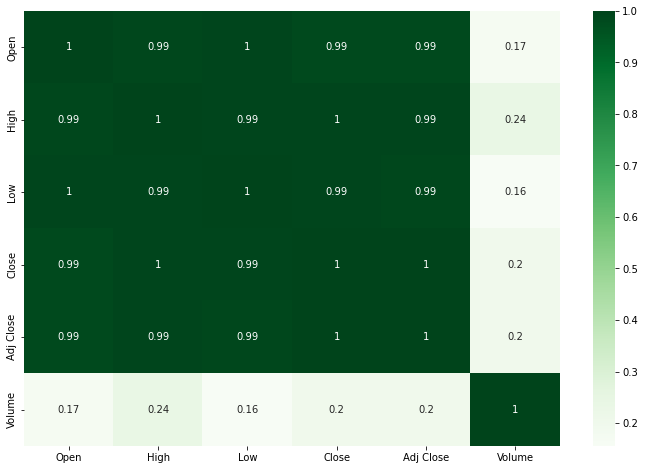

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linecolor='blue',cmap='Greens')

Adjusted Closing, Open , High and Low Prices has highest correlation with our Target column i.e. with Close Price. 
So , we are going to use only these four columns for better accuracy and predictions . 

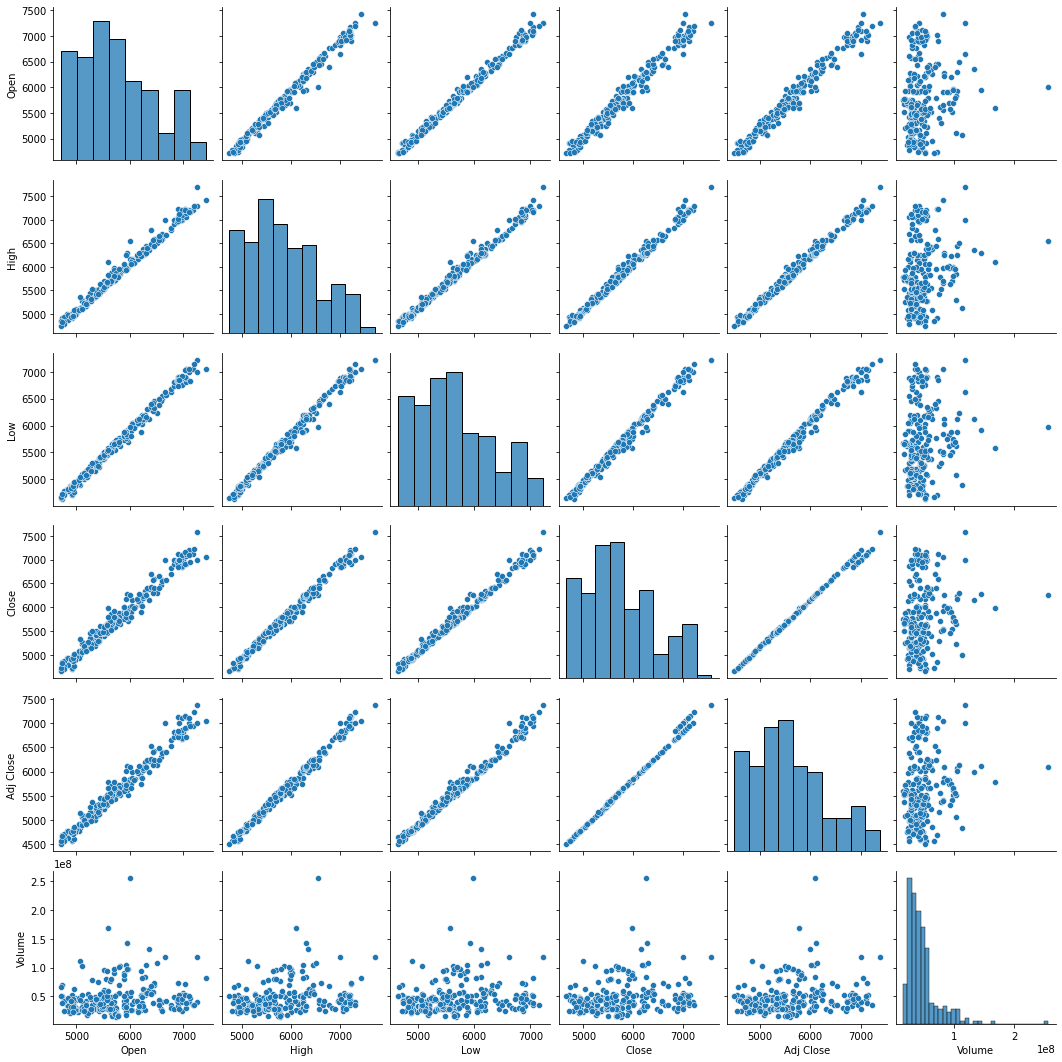

In [13]:
sns.pairplot(data=df);

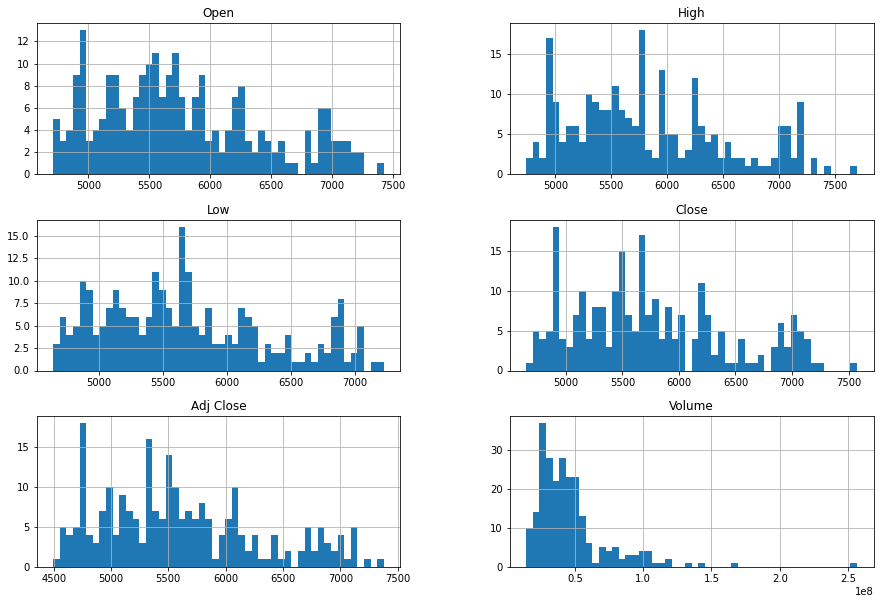

In [14]:
df.hist(bins=50,figsize=(15,10));

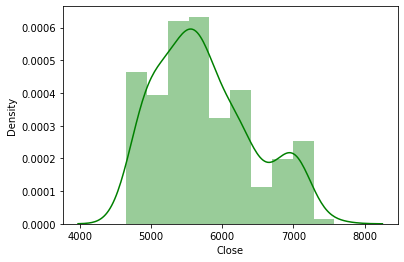

In [15]:
sns.distplot(df['Close'],hist=True,color='Green');

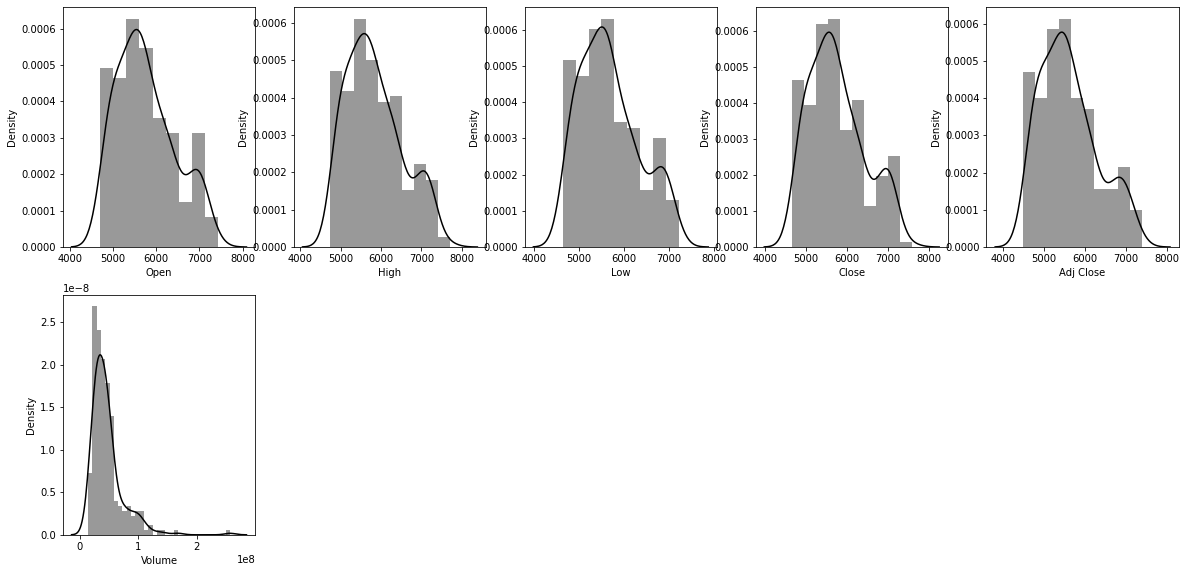

In [16]:
num_col=[col for col in df.columns if df[col].dtype != 'object']
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_col:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column],color='black');
        plt.xlabel(column)
    
        
    plotnumber += 1

## Feature Enginnering 

### Handling Missing Values 

In [17]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

We dont have missing values in this dataset.

### Handling Outliers . 

As we are going to focus only on Open , High and Low and Wap , Lets find out and Handle the outliers of these columns only. 

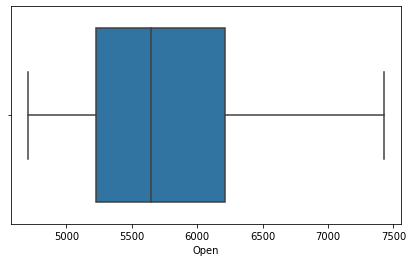

In [18]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Open',data=df,orient='h');

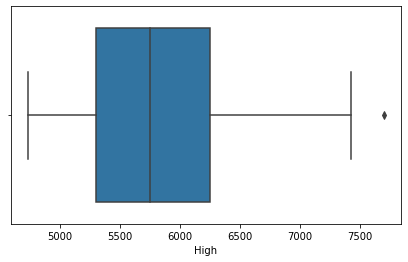

In [19]:
plt.figure(figsize=(7,4))
sns.boxplot(x='High',data=df,orient='h');

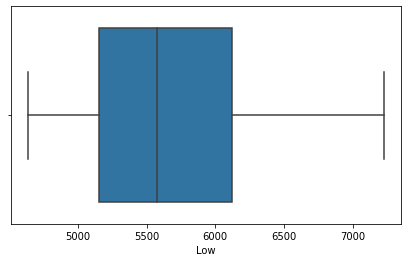

In [20]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Low',data=df,orient='h');

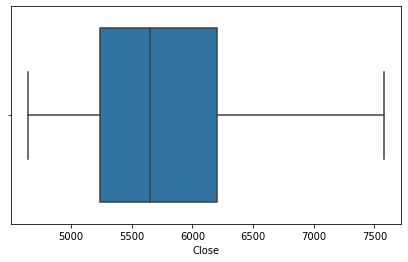

In [21]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Close',data=df,orient='h');

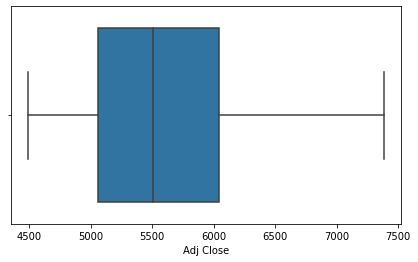

In [22]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Adj Close',data=df,orient='h');

There are no outliers in these Columns 

### Exploratory Data Analysis 
Exploring and creating various graphical representations to understand the data better.

### Feature Extraction 

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df['Day']=df['Date'].dt.weekday
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [25]:
df.drop('Date',axis=1,inplace=True)

In [26]:
df['Day'].value_counts()

4    49
0    49
2    49
3    49
1    47
Name: Day, dtype: int64

In [27]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,5175.0,5225.0,5125.0,5150.0,4978.488770,24346700,4,5,2021
1,5175.0,5300.0,5150.0,5250.0,5075.158691,41498000,0,5,2021
2,5350.0,5350.0,5275.0,5325.0,5147.660645,43217400,2,6,2021
3,5350.0,5350.0,5275.0,5350.0,5171.828125,49012700,3,6,2021
4,5325.0,5350.0,5200.0,5225.0,5050.991211,35211100,4,6,2021
5,5225.0,5300.0,5200.0,5250.0,5075.158691,31693200,0,6,2021
6,5300.0,5325.0,5200.0,5275.0,5099.325684,35402300,1,6,2021
7,5275.0,5350.0,5225.0,5325.0,5147.660645,24331300,2,6,2021
8,5400.0,5425.0,5325.0,5400.0,5220.163086,42924200,3,6,2021
9,5400.0,5425.0,5250.0,5275.0,5099.325684,44421700,4,6,2021


In [28]:
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
228,7175.0,7200.0,7050.0,7125.0,6942.524902,34988500,2,4,2022
229,7250.0,7700.0,7225.0,7575.0,7381.000000,118152200,3,4,2022
230,7425.0,7425.0,7050.0,7050.0,7050.000000,81089600,0,5,2022
231,6650.0,7000.0,6625.0,7000.0,7000.000000,118477400,1,5,2022
232,7025.0,7225.0,6900.0,6900.0,6900.000000,71287600,2,5,2022
233,6900.0,7025.0,6725.0,6850.0,6850.000000,45587500,3,5,2022
234,6900.0,7225.0,6850.0,7125.0,7125.000000,73260300,4,5,2022
235,7250.0,7300.0,7000.0,7000.0,7000.000000,40279200,1,5,2022
236,6975.0,7200.0,6925.0,7100.0,7100.000000,44859900,2,5,2022
237,6925.0,7125.0,6850.0,7000.0,7000.000000,27558300,3,5,2022


In [29]:
days = {1:'Tuesday',0:'Monday',3:'Thursday',2:'Wednesday',4: 'Friday',5:'Saturday',6:'Sunday'}
df['Day'] = df['Day'].map(days)

### Graphical Representation

In [30]:
yw=df.groupby('Year')['Volume'].sum()
yw

Year
2021    6700016400
2022    4674756900
Name: Volume, dtype: int64

Text(0.5, 1.0, 'Volume')

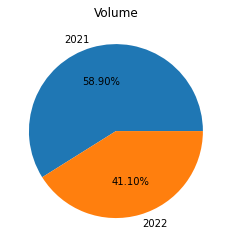

In [31]:
plt.pie(yw,labels=df['Year'].unique(),autopct='%1.2f%%');
plt.title('Volume')

In [32]:
dw = df.groupby('Day')['Volume'].sum().reset_index()
dw.head(10)

,Day,Volume
0,Friday,2214562600
1,Monday,2058806700
2,Thursday,2281984600
3,Tuesday,2284480100
4,Wednesday,2534939300


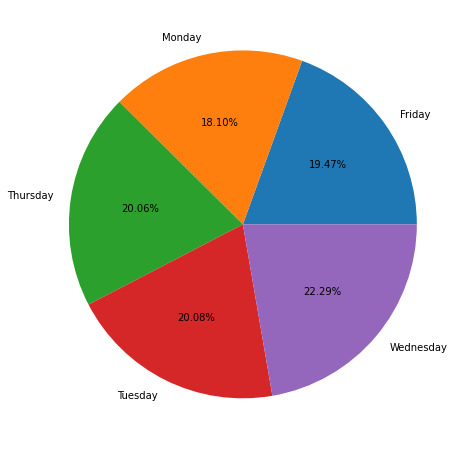

In [33]:
plt.figure(figsize=(10,8))
plt.pie(dw['Volume'],labels= dw['Day'],autopct='%1.2f%%');

In [34]:
dw = df.groupby('Day')['High'].sum().reset_index()
dw.head(10)

,Day,High
0,Friday,283805.0
1,Monday,284010.0
2,Thursday,286335.0
3,Tuesday,276605.0
4,Wednesday,287350.0


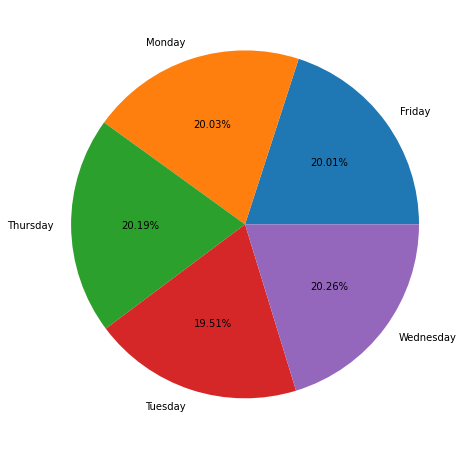

In [35]:
plt.figure(figsize=(10,8))
plt.pie(dw['High'],labels= dw['Day'],autopct='%1.2f%%');

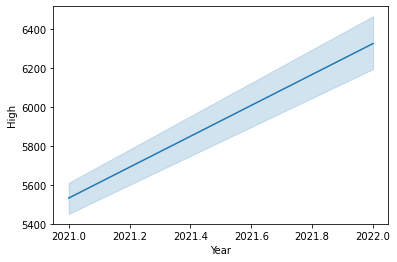

In [36]:
sns.lineplot(data=df, x="Year", y="High");

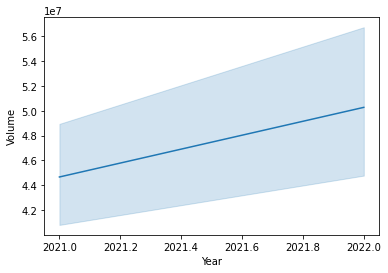

In [37]:
sns.lineplot(data=df, x="Year", y="Volume");

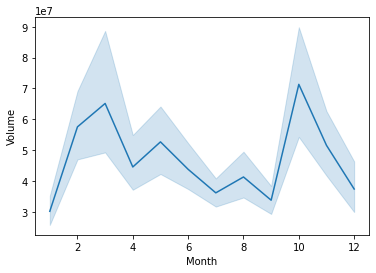

In [38]:
sns.lineplot(data=df,x='Month',y='Volume');

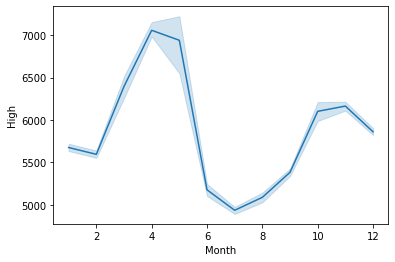

In [39]:
sns.lineplot(data=df,x='Month',y='High');

**OBSERVATIONS**



*   Wednesday , Tuesday and Thursday are the days when maximum Volume takes place. 

-   Usually the stock is at high price on Wednesday , Thursdays and Monday. 

-   In 2021, the stock price was at its low, the line elevated when the price started rising and from then the line went on elevating till 2021 till April 2022

-  The line has formed a peak at the 10th month in the graph , which means that maximum Volume happens in the month of October. 

-  The line has formed a peak at the 4th month in the graph , which means that maximum High price happens in the month of April. 

## Model Building

**Simple Linear Regression**

### Feature Selection 

In [40]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day', 'Month',
       'Year'],
      dtype='object')

In [41]:
df.drop(['Volume', 'Day', 'Month', 'Year'],axis=1,inplace=True)

In [42]:
X=df[['Adj Close']]
y=df['Close']

**Applying Algorithm**

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr=LinearRegression()

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
lr.score(X_train,y_train)

0.9971321402457973

In [49]:
lr.score(X_test,y_test)

0.9981162573268388

we got a generalized model for this dataset by using Simple Linear Regression.

### Best Fit Line

In [50]:
lr.coef_

array([0.97258126])

In [51]:
lr.intercept_

305.9463846122926

Text(0, 0.5, 'Close')

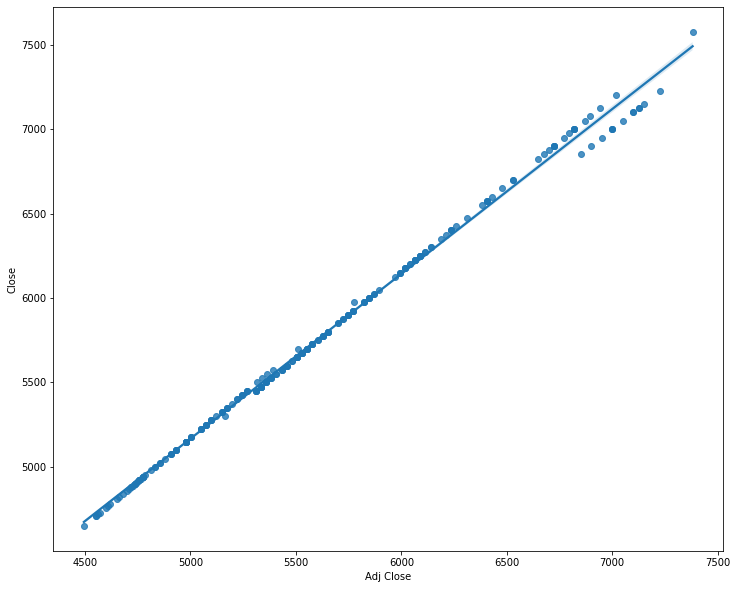

In [52]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('Adj Close')
plt.ylabel("Close")

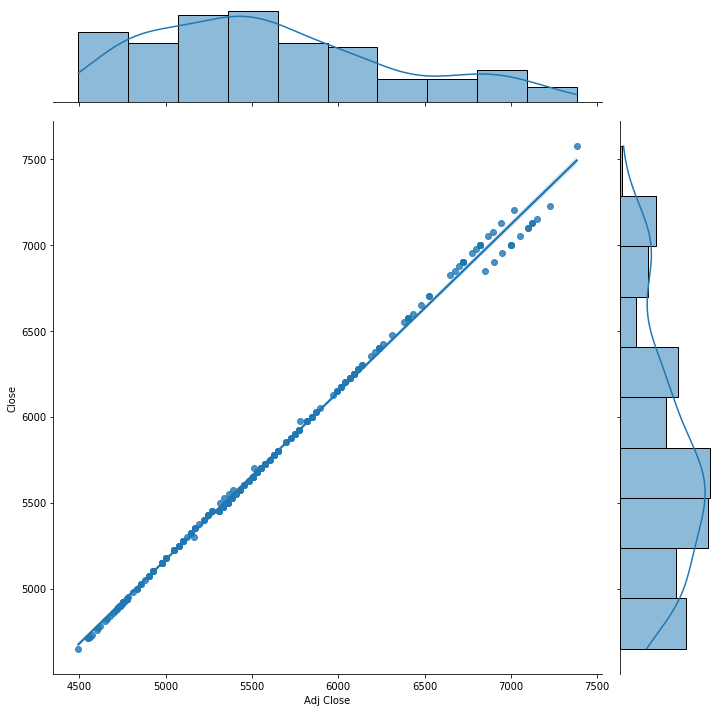

In [53]:
sns.jointplot(x='Adj Close', y='Close', data=df, kind='reg', size=10);

### Performace Measures

In [54]:
y_pred = lr.predict(X_test)

In [55]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,y_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_pred))

R score 0.9981162573268388
MSE =  788.7108180248775


**COMPARING ACTUAL AND PREDICTED VALUES**

In [56]:
lr_diff=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

In [57]:
lr_diff.head(5)

,Actual Value,Predicted Value
186,5650.0,5660.298274
117,6175.0,6157.826776
47,4890.0,4903.481413
69,5250.0,5241.950613
150,5725.0,5731.373639


In [58]:
lr_diff.tail()

,Actual Value,Predicted Value
171,5500.0,5518.147545
73,5525.0,5500.502888
44,4820.0,4837.668340
125,5900.0,5897.216314
146,5675.0,5683.990220


In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
scores  

array([0.99738724, 0.99662697, 0.99710168, 0.99550077, 0.99758122])

In [60]:
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9968395766177434

### Applying the Multiple Regression Algorithm

In [61]:
X=df.drop('Close',axis=1)
y=df['Close']

In [62]:
X.shape

(243, 4)

In [63]:
y.shape

(243,)

### Standardisation

In [64]:
from sklearn.preprocessing import StandardScaler
# define StandScaler scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [65]:
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

lr = LinearRegression().fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [66]:
lr.score(X_train, y_train)

0.9982905472545344

In [67]:
lr.score(X_test, y_test)

0.9964989492519714

We got a Generalized Model By using Multiple Regression with accuracy of 99%.

**COMPARING ACTUAL AND PREDICTED VALUES**

In [68]:
lr_diff=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

In [69]:
lr_diff.head()

,Actual Value,Predicted Value
24,5000.0,5014.024520
6,5275.0,5252.357012
152,5575.0,5589.791653
232,6900.0,7042.987495
238,7125.0,7236.663814


In [70]:
lr_diff.tail()

,Actual Value,Predicted Value
195,6250.0,6212.769722
67,5425.0,5403.922730
167,5450.0,5462.986706
38,4950.0,4943.926486
180,5500.0,5505.408853


### Performace Measures.

In [71]:
y_pred = lr.predict(X_test)

In [72]:
print("R score",metrics.r2_score(y_test,y_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_pred))

R score 0.9964989492519714
MSE =  1637.0677075282292


## Conclusion 

*   1) For Simple Linear Regression - After Applying Simple Linear Regression we got 99% accuracy for both training as well as testing set .
The **R score** = **0.99** and **MSE =  788.71**
*   2) Multiple Linear Regression. 
Multiple Regression also gave us 99% accuracy with **R score** = **0.99** and **MSE** = **1637.06** 

**We can Conlclude that both the algorithms are perfect for predicting the Close Price**